In [2]:
from sklearn.datasets import load_iris
import pandas as pd

# Tải dữ liệu IRIS
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
#Kiem tra thong tin du lieu
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


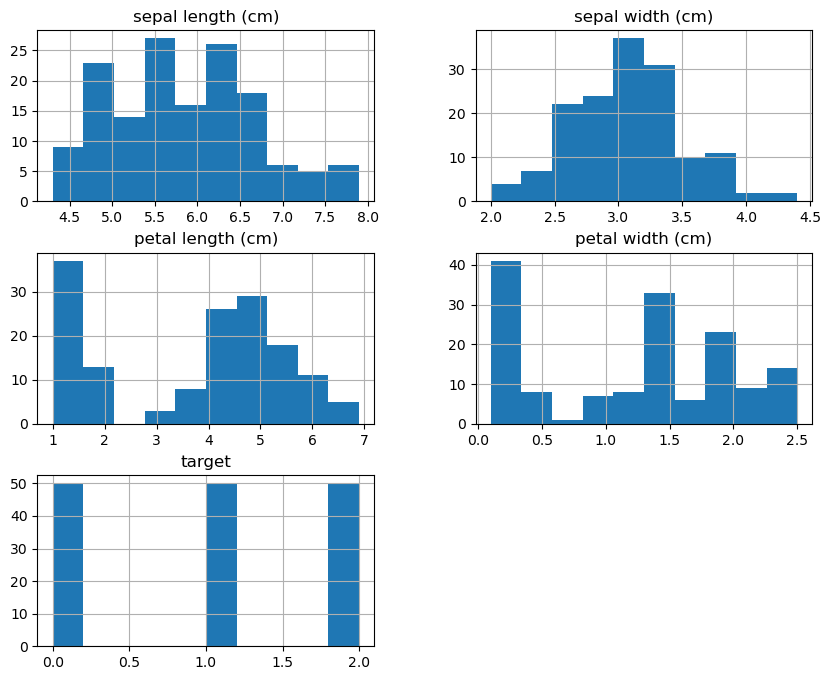

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ histogram
df.hist(figsize=(10, 8))
plt.show()


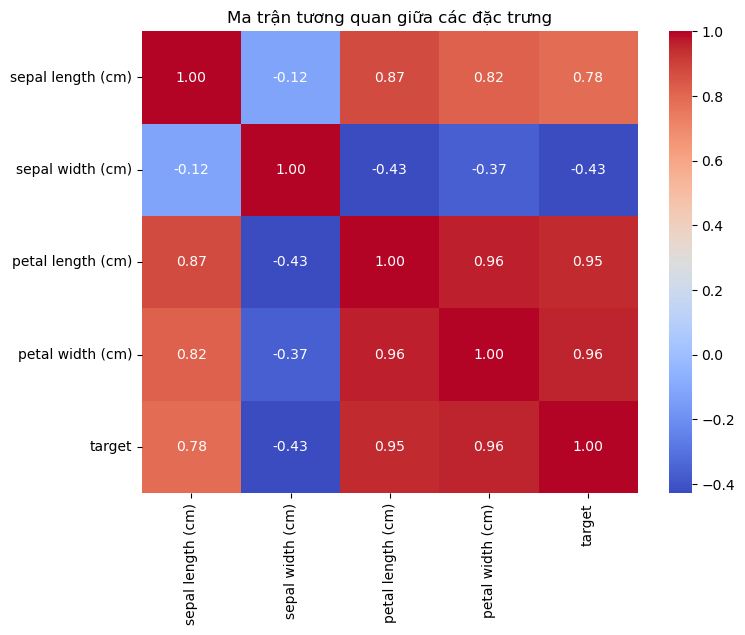

In [5]:
# Ma trận tương quan
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các đặc trưng")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['target'], test_size=0.2, random_state=42, stratify=df['target'])

# Huấn luyện mô hình KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
# Dự đoán trên tập TEST
y_pred = knn.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')
micro_f1 = f1_score(y_test, y_pred, average='micro')

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)
print(f"\nMacro F1-score: {macro_f1:.2f}")
print(f"Micro F1-score: {micro_f1:.2f}")

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Macro F1-score: 1.00
Micro F1-score: 1.00


In [12]:
# So sánh hiệu suất giữa các phương pháp
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Huấn luyện SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
macro_f1_svm = f1_score(y_test, y_pred_svm, average='macro')
micro_f1_svm = f1_score(y_test, y_pred_svm, average='micro')

# Huấn luyện Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
macro_f1_rf = f1_score(y_test, y_pred_rf, average='macro')
micro_f1_rf = f1_score(y_test, y_pred_rf, average='micro')

# So sánh kết quả
print("\nSo sánh F1-score giữa các mô hình:")
print(f"KNN - Macro F1: {macro_f1:.2f}, Micro F1: {micro_f1:.2f}")
print(f"SVM - Macro F1: {macro_f1_svm:.2f}, Micro F1: {micro_f1_svm:.2f}")
print(f"Random Forest - Macro F1: {macro_f1_rf:.2f}, Micro F1: {micro_f1_rf:.2f}")



So sánh F1-score giữa các mô hình:
KNN - Macro F1: 1.00, Micro F1: 1.00
SVM - Macro F1: 1.00, Micro F1: 1.00
Random Forest - Macro F1: 0.90, Micro F1: 0.90


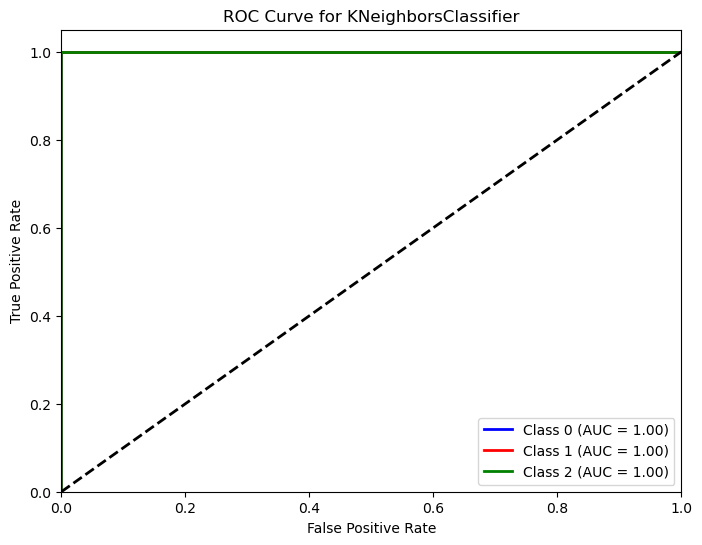

AUC scores: {0: 1.0, 1: 1.0, 2: 1.0}


In [13]:
# Vẽ đường cong ROC và tính AUC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = knn.predict_proba(X_test)

# Vẽ đường cong ROC
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])
fpr, tpr, roc_auc = {}, {}, {}

for i, color in zip(range(3), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNeighborsClassifier')
plt.legend(loc="lower right")
plt.show()

print("AUC scores:", roc_auc)


1. Điểm mạnh của mô hình
+ Độ chính xác cao: Mô hình KNN hoạt động rất tốt trên tập dữ liệu IRIS vì đây là một tập dữ liệu có biên rõ ràng giữa các lớp. Điều này giúp thuật toán tìm được láng giềng gần đúng mà không bị nhầm lẫn quá nhiều.
+ Không cần giả định về phân phối dữ liệu: Khác với các thuật toán như Naive Bayes hay Logistic Regression, KNN không yêu cầu dữ liệu phải tuân theo bất kỳ phân phối xác suất nào.
+ Dễ triển khai: Đây là một mô hình đơn giản, dễ hiểu và dễ cài đặt. Chỉ cần chọn số lượng láng giềng 
𝑘
k phù hợp là có thể sử dụng ngay.

2. Điểm yếu của mô hình
- Hiệu suất kém với dữ liệu lớn: Vì KNN cần tính khoảng cách từ một điểm đến tất cả các điểm khác trong tập huấn luyện, khi dữ liệu lớn, thời gian tính toán sẽ tăng lên đáng kể.
_ Nhạy cảm với nhiễu và giá trị ngoại lai: Nếu dữ liệu chứa các giá trị ngoại lai hoặc nhiễu, KNN có thể bị ảnh hưởng đáng kể, đặc biệt khi giá trị 
𝑘

3. Hiệu suất dự đoán
Confusion Matrix cho thấy mô hình phân loại khá tốt nhưng vẫn có một số sai sót nhỏ giữa các lớp.
Macro F1-score vs. Micro F1-score: Giá trị F1-score cho thấy mô hình cân bằng tốt giữa precision và recall, tuy nhiên có thể cần điều chỉnh 
𝑘
k để tối ưu hơn.
ROC và AUC: AUC của từng lớp khá cao (gần 1.0), chứng tỏ mô hình có khả năng phân biệt tốt giữa các lớp.
4. Đề xuất cải tiến
- Tối ưu số lượng láng giềng 
𝑘
k: Thử nghiệm với nhiều giá trị 
𝑘
k khác nhau (ví dụ: sử dụng Cross-validation) để tìm giá trị tối ưu.
- Chuẩn hóa dữ liệu: Vì KNN dựa trên khoảng cách, việc chuẩn hóa dữ liệu (StandardScaler, MinMaxScaler) có thể giúp cải thiện hiệu suất mô hình.
- Giảm chiều dữ liệu: Nếu áp dụng trên tập dữ liệu lớn hơn, có thể sử dụng PCA hoặc LDA để giảm chiều dữ liệu, tăng tốc độ tính toán.
- Thử nghiệm với các mô hình khác: So sánh với các thuật toán như SVM, Random Forest hoặc Logistic Regression để xem liệu có mô hình nào phù hợp hơn với bài toán này không.